In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df=pd.read_csv('/content/Average time spend by a user on social media_data.csv')
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [ ]:
df['gender'].value_counts()

male          337
non-binary    332
female        331
Name: gender, dtype: int64

In [ ]:
df['time_spent'].value_counts()

5    125
4    120
2    112
9    111
6    110
8    109
3    107
7    107
1     99
Name: time_spent, dtype: int64

In [ ]:
df['interests'].value_counts()

Lifestlye    341
Sports       331
Travel       328
Name: interests, dtype: int64

In [ ]:
df['location'].value_counts()

Australia         352
United Kingdom    329
United States     319
Name: location, dtype: int64

In [ ]:
df['demographics'].value_counts()

Rural        340
Sub_Urban    335
Urban        325
Name: demographics, dtype: int64

In [ ]:
df['age'].value_counts()

43    33
45    30
50    30
52    28
54    27
64    27
49    25
22    25
18    25
62    25
56    25
41    25
42    24
20    24
40    24
19    24
61    23
25    23
23    23
53    23
29    22
34    22
39    22
47    21
33    21
36    20
28    20
46    19
38    19
21    19
31    19
51    18
27    18
58    18
37    18
26    18
30    18
32    18
59    17
57    17
35    16
48    16
44    16
55    16
24    14
63    13
60    12
Name: age, dtype: int64

In [ ]:
df['Owns_Car'].value_counts()

True     539
False    461
Name: Owns_Car, dtype: int64

In [ ]:
df['platform'].value_counts()

Instagram    363
YouTube      330
Facebook     307
Name: platform, dtype: int64

In [ ]:
df['profession'].value_counts()

Marketer Manager     355
Software Engineer    336
Student              309
Name: profession, dtype: int64

In [ ]:
df['indebt'].value_counts()

False    503
True     497
Name: indebt, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df.sample(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
667,36,male,2,YouTube,Sports,United States,Rural,Software Engineer,18428,False,True,False
187,44,female,4,YouTube,Sports,United Kingdom,Urban,Student,11667,True,True,True
908,30,non-binary,2,YouTube,Travel,Australia,Rural,Software Engineer,19496,False,False,True
385,62,female,4,Instagram,Sports,United Kingdom,Rural,Software Engineer,17776,True,True,True
704,30,male,6,YouTube,Lifestlye,Australia,Urban,Student,19828,False,True,True


In [ ]:
avg_time_on_social_media=df.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()
avg_time_on_social_media

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


In [ ]:
fig=px.bar(avg_time_on_social_media,x='platform',y='time_spent',color='time_spent',title='Avg. Time spent on Social media platforms')
fig.show(render='iframe')

In [ ]:
profession_SocialMedia_avgTime=df.groupby(by=['profession','platform']).agg({'time_spent':'mean'}).reset_index()
profession_SocialMedia_avgTime

,profession,platform,time_spent
0,Marketer Manager,Facebook,5.281818
1,Marketer Manager,Instagram,5.031250
2,Marketer Manager,YouTube,4.991453
3,Software Engineer,Facebook,4.797872
4,Software Engineer,Instagram,5.265625
5,Software Engineer,YouTube,4.719298
6,Student,Facebook,5.048544
7,Student,Instagram,5.158879
8,Student,YouTube,4.898990


In [ ]:
fig=px.bar(profession_SocialMedia_avgTime,x='profession',y='time_spent',color='platform',barmode='group',title='Average Time Spent on Social Media Platforms by Profession')
fig.show(render='iframe')

In [ ]:
fig=px.line(profession_SocialMedia_avgTime,x='profession',y='time_spent',color='platform',title='Average Time Spent on Social Media Platforms by Profession')
fig.show(render='iframe')

In [ ]:
import plotly.graph_objects as go

# Assuming profession_SocialMedia_avgTime is a DataFrame containing average time spent on social media platforms by profession

# Create scatter graph
scatter_graph = go.Figure()

for platform in profession_SocialMedia_avgTime['platform'].unique():
    scatter_graph.add_trace(go.Scatter(
        x=profession_SocialMedia_avgTime[profession_SocialMedia_avgTime['platform'] == platform]['profession'],
        y=profession_SocialMedia_avgTime[profession_SocialMedia_avgTime['platform'] == platform]['time_spent'],
        mode='markers',
        name=platform
    ))

# Customize layout
scatter_graph.update_layout(
    title='Average Time Spent on Social Media Platforms by Profession',
    xaxis=dict(title='profession'),
    yaxis=dict(title='Time Spent'),
    legend=dict(title='Platform')
)

# Show the plot
scatter_graph.show()


In [ ]:
import plotly.graph_objects as go

# Pivot the DataFrame to create a matrix of average time spent on social media platforms by profession
heatmap_data = profession_SocialMedia_avgTime.pivot(index='profession', columns='platform', values='time_spent')

# Create heatmap
heatmap = go.Figure(data=go.Heatmap(
                   z=heatmap_data.values,
                   x=heatmap_data.columns,
                   y=heatmap_data.index,
                   colorscale='Viridis'))

# Customize layout
heatmap.update_layout(title='Average Time Spent on Social Media Platforms by Profession',
                      xaxis=dict(title='Platform'),
                      yaxis=dict(title='Profession'))

# Show the plot
heatmap.show()


<ipython-input-25-578d31a5e055>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



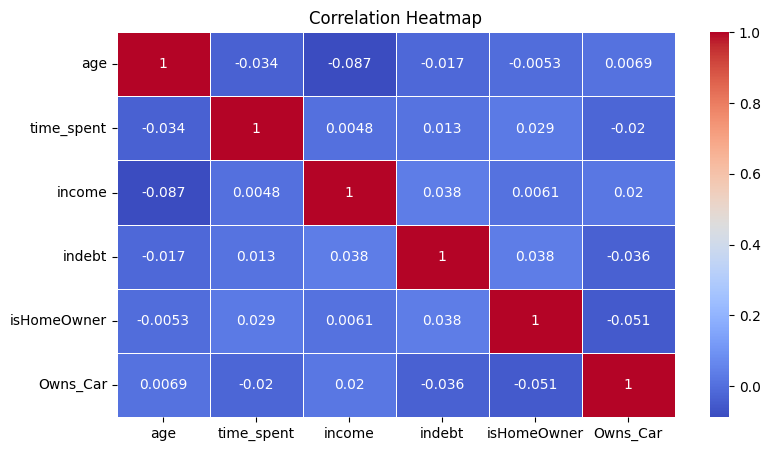

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
summary_stats =df.describe()
print(summary_stats)

               age   time_spent        income
count  1000.000000  1000.000000   1000.000000
mean     40.986000     5.029000  15014.823000
std      13.497852     2.537834   2958.628221
min      18.000000     1.000000  10012.000000
25%      29.000000     3.000000  12402.250000
50%      42.000000     5.000000  14904.500000
75%      52.000000     7.000000  17674.250000
max      64.000000     9.000000  19980.000000
